# Проект: Исследование сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  

**без подписки**  
 - абонентская плата отсутствует;  
 - стоимость одной минуты поездки — 8 рублей;  
 - стоимость старта (начала поездки) — 50 рублей;
   
**с подпиской Ultra**  
 - абонентская плата — 199 рублей в месяц;  
 - стоимость одной минуты поездки — 6 рублей;  
 - стоимость старта — бесплатно.

#### Описание данных
В основных данных есть информация о пользователях, их поездках и подписках.  

**Пользователи** — `users_go.csv`  

`user_id` - уникальный идентификатор пользователя  
`name` - имя пользователя  
`age` - возраст  
`city` - город  
`subscription_type` - тип подписки (free, ultra)  

**Поездки** — `rides_go.csv`  

`user_id` - уникальный идентификатор пользователя  
`distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)  
`duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  
`date` - дата совершения поездки  

**Подписки** — `subscriptions_go.csv`  

`subscription_type` - тип подписки  
`minute_price` - стоимость одной минуты поездки по данной подписке  
`start_ride_price` - стоимость начала поездки  
`subscription_fee` - стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

pd.options.display.max_columns = 50

#### Шаг 1. Загрузка данных

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
except:
    data_users = pd.read_csv('users_go.csv')
    
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
try:
    data_riders = pd.read_csv('/datasets/rides_go.csv')
except:
    data_riders = pd.read_csv('rides_go.csv')
    
data_riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
try:
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_subscriptions = pd.read_csv('subscriptions_go.csv')
    
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [5]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод**  

Вывели первые строки каждой таблицы. Посмотрели с помощью инфо информацию о датафреймах. Пропусков нет, с наименованием столбцов все впорядке, типы данных верные, кроме столбца `date` таблицы `data_riders`, исправим тип данных далее.

#### Шаг 2. Предобработка данных

Приведем столбец date к типу даты pandas

In [8]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format='%Y-%m-%dT%H:%M:%S')

Создадим новый столбец с номером месяца на основе столбца date.

In [9]:
data_riders['date_month'] = data_riders['date'].dt.month

Проверим датафреймы на наличие пропусков и дубликатов

In [10]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
data_riders.isna().sum()

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

In [12]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [13]:
data_users.duplicated().sum()

31

In [14]:
data_riders.duplicated().sum()

0

In [15]:
data_subscriptions.duplicated().sum()

0

Избавимся от дубликатов

In [16]:
data_users = data_users.drop_duplicates()

Проверим

In [17]:
data_users.duplicated().sum()

0

**Вывод**

Загрузили и рассмотрели данные.

Пропусков в данных нет, избавились от дубликатов в датафрейме `data_users`, изменили тип данных в колонке `'date'` датафрейма `data_riders`, добавили новую колонку с месяцами в датафрейм `data_riders`

#### Шаг 3. Исследовательский анализ данных

Посмотрим и визуализируем информацию о частоте встречаемости городов

In [18]:
count_city = data_users['city'].value_counts()
count_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

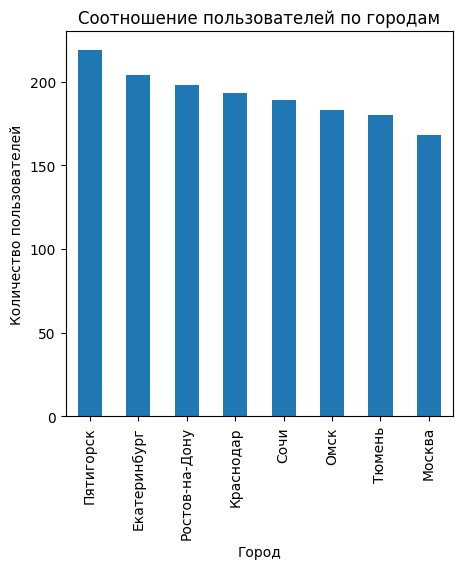

In [19]:
data_users['city'].value_counts().plot(
    kind='bar',
    y = count_city,
    figsize = (5,5),
    title = 'Соотношение пользователей по городам',
    xlabel = 'Город',
    ylabel = 'Количество пользователей'
);

Посмотрим и визуализируем соотношение пользователей с подпиской и без подписки

In [20]:
count_subscription = data_users['subscription_type'].value_counts()
count_subscription

free     835
ultra    699
Name: subscription_type, dtype: int64

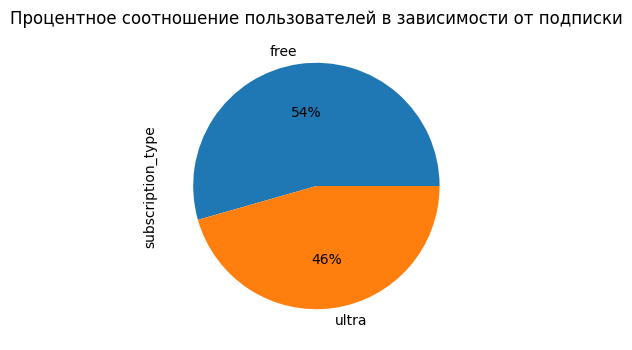

In [21]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_subscription, 
    autopct = '%1.0f%%', 
    figsize = (4,4),
    title = 'Процентное соотношение пользователей в зависимости от подписки');

Посмотрим и визуализируем возраст пользователей

In [22]:
data_users['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43], dtype=int64)

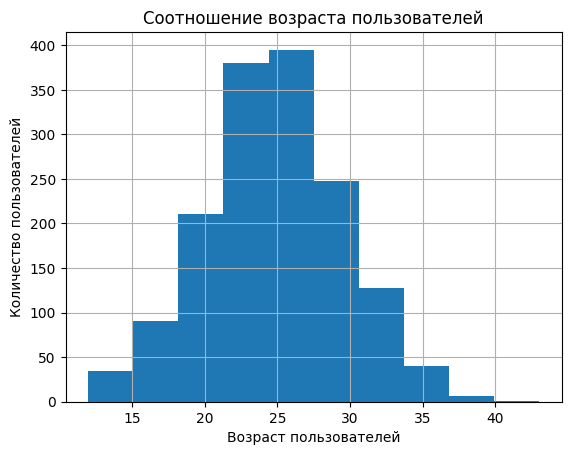

In [23]:
plt.hist(data_users['age'], bins=10)
plt.title('Соотношение возраста пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст пользователей')
plt.grid()
plt.show();

**Расстояние и время поездок пользователей**

Посмотрим на таблицу с расстояниями и временем для всех пользователей

In [24]:
data_riders.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Посмотрим на общую дистанцию поездок для каждого пользователя

In [25]:
data_riders_duration = round(data_riders.groupby('user_id')['distance'].sum(), 1)
data_riders_duration.head(10)

user_id
1     34070.2
2     33964.1
3     36907.6
4     44837.2
5     35556.9
6     34078.6
7     48707.5
8     15754.3
9     23730.9
10    29528.2
Name: distance, dtype: float64

Посмотрим на минимальные расстояния, которое пользователь преодолел за одну поездку

In [26]:
round(data_riders['distance'].sort_values(), 2).head(10)

11555     0.86
9541      2.57
13690     4.33
8658      6.78
7841      7.10
8906     11.28
8324     12.23
13940    15.00
15626    15.37
11862    15.63
Name: distance, dtype: float64

Посмотрим на максимальные расстояния, которое пользователь преодолел за одну поездку

In [27]:
round(data_riders['distance'].sort_values(ascending=False), 1).head(10)

16309    7211.0
16484    7066.0
15580    6908.5
17171    6760.9
17242    6724.9
10341    6672.0
11385    6601.2
12086    6538.9
10915    6535.4
11319    6503.6
Name: distance, dtype: float64

Построим гистограмму расстояний преодоленных пользователями

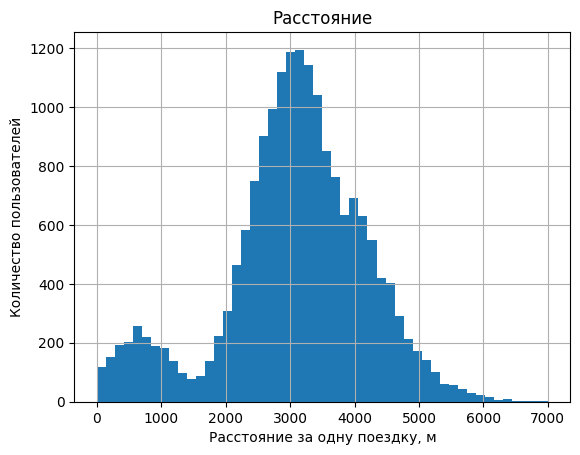

In [28]:
plt.hist(data_riders['distance'], bins=50, range=(0, 7000))
plt.title('Расстояние')
plt.ylabel('Количество пользователей')
plt.xlabel('Расстояние за одну поездку, м')
plt.grid()
plt.show();

**Продолжительность поездок пользователей**

Посмотрим на общее время поездок для каждого пользователя

In [29]:
data_riders_duration = round(data_riders.groupby('user_id')['duration'].sum(), 2)
data_riders_duration.head(10)

user_id
1     204.60
2     197.64
3     233.19
4     288.56
5     174.07
6     203.30
7     258.37
8      90.68
9     129.79
10    171.86
Name: duration, dtype: float64

Посмотрим на самые короткие поездки

In [30]:
data_riders['duration'].sort_values().head(10)

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
15015    0.5
13012    0.5
7508     0.5
16589    0.5
9049     0.5
Name: duration, dtype: float64

Посмотрим на самые длительные поездки

In [31]:
round(data_riders['duration'].sort_values(ascending=False), 1).head(10)

4215    40.8
4709    39.9
2623    39.5
1998    38.4
6453    38.3
143     38.1
3729    37.0
499     36.9
6348    36.8
4653    36.6
Name: duration, dtype: float64

Построим гистограмму времени проведенного пользователями в поездках

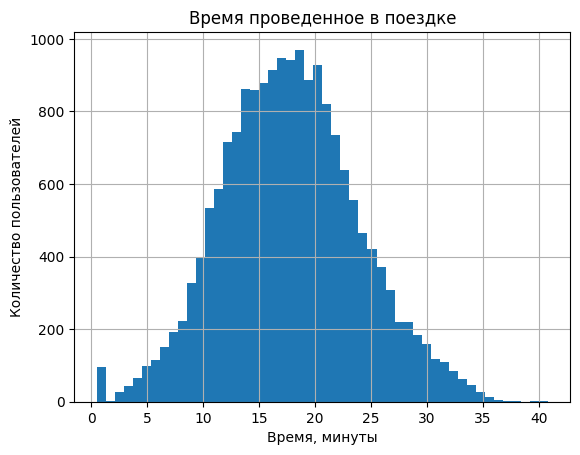

In [32]:
plt.hist(data_riders['duration'], bins=50)
plt.title('Время проведенное в поездке')
plt.ylabel('Количество пользователей')
plt.xlabel('Время, минуты')
plt.grid()
plt.show();

**Вывод**  

**Частота встречаемости городов**  

Количество пользователей по городам распределено примерно одинаково, нет сильно выделяющихся значений. Больше всего пользователей в Пятигорске - 219, меньше всего пользователей в Москве - 168. 

**Соотношение пользователей с подпиской и без подписки**  

Пользователей, использующих бесплатную подписку больше, чем пользователей имеющих платную подписку, всего таких - 835 человек, это примерно 54% от общего числа пользователей. Пользователей имеющих платную подписку - 699 человек, это примерно 46%.  

**Возраст пользователей**  

Самыми младшими являются пользователи 12, 13 лет, самыми старшими - около 43 лет.  
Основной контингент пользователей люди с возрастом от 20 до 30 лет.    

**Расстояние, которое пользователь преодолел за одну поездку**  

Самая короткая дистанция - 0.86 км. Самая длинная - 7.2 км  
В основном пользователи проезжают от 2.4 км до 4 км.  

**Продолжительность поездок**  

Самые короткие поездки - пол минуты. Возможно пользователи передумали пользоваться самокатом, либо была какая-то техническая неисправность самоката.  
Самая длинная поездка заняла около 40 минут.  
В основном же длительность поездки состовляет 13 - 22 минуты.

#### Шаг 4. Объединение данных

**Объединим данные о пользователях, поездках и подписках в один датафрейм**

In [33]:
data_merge = data_users.merge(data_riders)

In [34]:
data_merge = data_merge.merge(data_subscriptions)

In [35]:
data_merge.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [36]:
data_merge.shape

(18068, 12)

**Создадим датафрейм c данными о пользователях без подписки**

In [37]:
data_merge_subscription_free = data_merge.loc[data_merge['subscription_type'] == 'free']
data_merge_subscription_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Построим график с преодоленным расстоянием пользователей без подписки

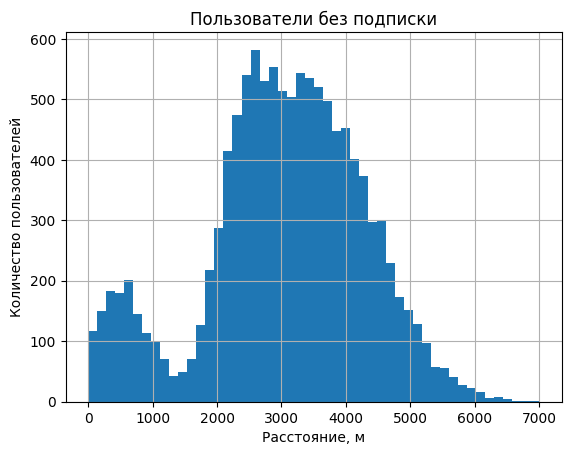

In [38]:
plt.hist(data_merge_subscription_free['distance'], bins=50, range=(0, 7000))
plt.title('Пользователи без подписки')
plt.ylabel('Количество пользователей')
plt.xlabel('Расстояние, м')
plt.grid()
plt.show();

Построим график с временем поездки пользователей без подписки

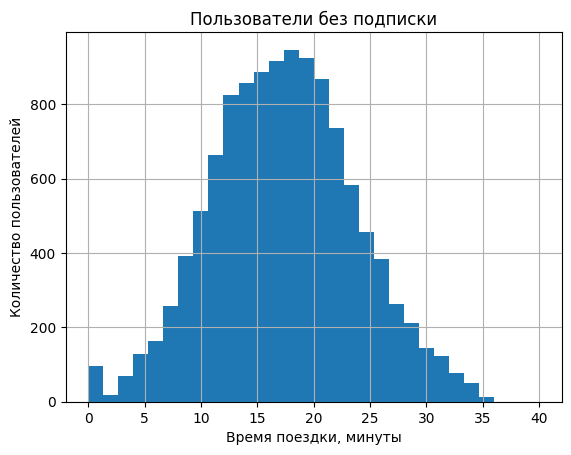

In [39]:
plt.hist(data_merge_subscription_free['duration'], bins=30, range=(0, 40))
plt.title('Пользователи без подписки')
plt.ylabel('Количество пользователей')
plt.xlabel('Время поездки, минуты')
plt.grid()
plt.show();

**Создадим датафрейм c данными о пользователях с подпиской**

In [40]:
data_merge_subscription_ultra = data_merge.loc[data_merge['subscription_type'] == 'ultra']
data_merge_subscription_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Построим график с преодоленным расстоянием пользователей с платной подпиской

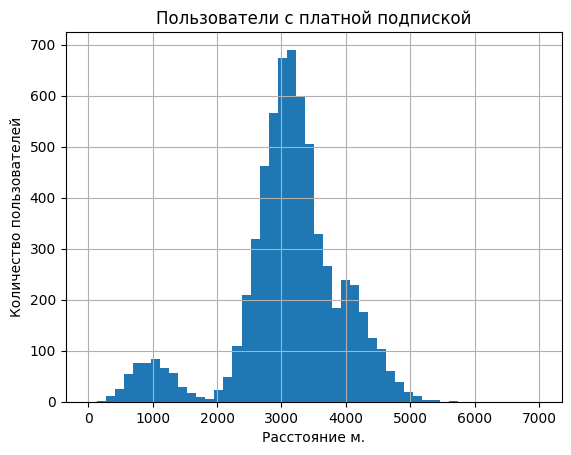

In [41]:
plt.hist(data_merge_subscription_ultra['distance'], bins=50, range=(0, 7000))
plt.title('Пользователи с платной подпиской')
plt.ylabel('Количество пользователей')
plt.xlabel('Расстояние м.')
plt.grid()
plt.show();

Построим график с временем поездки пользователей с платной подпиской

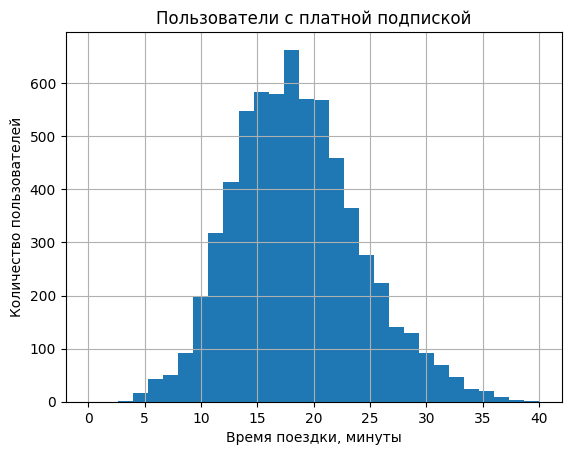

In [42]:
plt.hist(data_merge_subscription_ultra['duration'], bins=30, range=(0, 40))
plt.title('Пользователи с платной подпиской')
plt.ylabel('Количество пользователей')
plt.xlabel('Время поездки, минуты')
plt.grid()
plt.show();

**Вывод**

Объединили данные о пользователях, поездках и тарифах в один датафрейм - `data_merge`.  

Создали еще два датафрейма

`data_merge_subscription_free` - информация о пользователях без подписки   
`data_merge_subscription_ultra` - информация о пользователях с платной подпиской  
Визуализировали информацию о расстоянии и времени для пользователей с бесплатной подпиской и платной.  

Для пользователей с бесплатной подпиской, время поездки составляет примерно от 10 до 25 минут, проезжают такие пользователи примерно от 2 до 4.5 км, есть пользователи, которые проехали 6.5 - 7 км.  

Для пользователей с платной подпиской, время поездки составляет примерно от 12 до 23 минут. Основное количество пользователей проезжают расстояние около 2.9 - 3.3 км.  

Можно сделать вывод, что пользователи с бесплатной подпиской, совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи с платной подпиской.

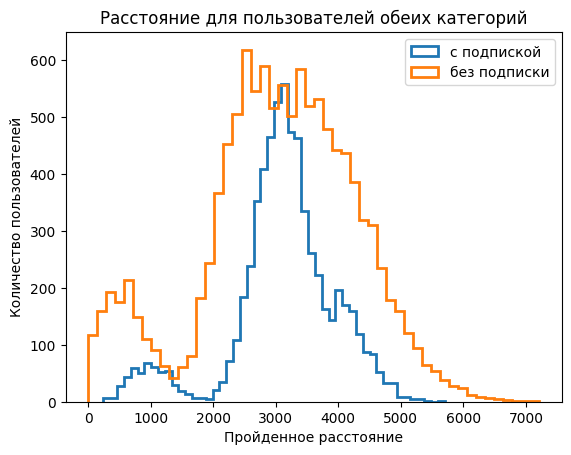

In [43]:
data_merge_subscription_ultra['distance'].plot(kind='hist', histtype='step'
                                        , bins=50, label='c подпиской', linewidth=2, legend=True)
data_merge_subscription_free['distance'].plot(kind='hist', histtype='step'
                                        , bins=50, label='без подписки', linewidth=2, legend=True)
plt.title('Расстояние для пользователей обеих категорий')
plt.xlabel('Пройденное расстояние')
plt.ylabel('Количество пользователей')
plt.show()

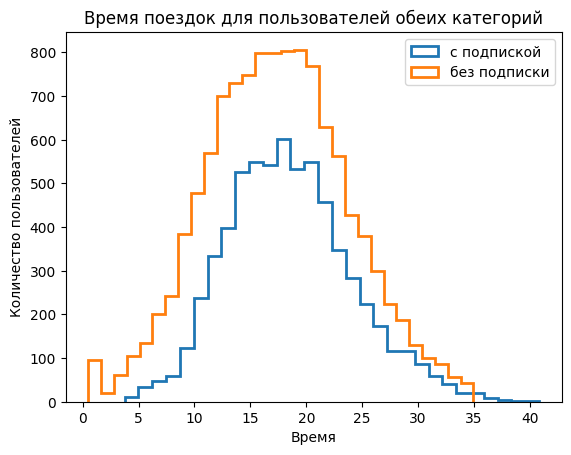

In [44]:
data_merge_subscription_ultra['duration'].plot(kind='hist', histtype='step'
                                        , bins=30, label='c подпиской', linewidth=2, legend=True)
data_merge_subscription_free['duration'].plot(kind='hist', histtype='step'
                                        , bins=30, label='без подписки', linewidth=2, legend=True)
plt.title('Время поездок для пользователей обеих категорий')
plt.xlabel('Время')
plt.ylabel('Количество пользователей')
plt.show()

#### Шаг 5. Подсчёт выручки

**Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц**

In [45]:
data_merge.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [46]:
data_merge['distance'] = round(data_merge['distance'], 1)

Создадим датафрейм с агрегированными данными

In [47]:
agg_data = pd.pivot_table(data_merge,
                           index=['date_month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len,
                                      'subscription_type' : min})

Перименуем колонку с именем 'name' на количество поездок 'count_trips'

In [48]:
agg_data.rename(columns = {'name' : 'count_trips'}, inplace = True)

Округлим к потолку данные колонки 'duration'

In [49]:
agg_data['duration'] = np.ceil(agg_data['duration'])

Посмотрим информацию по каждому пользователю за каждый месяц

In [50]:
agg_data.sort_values(by='date_month').head()

distance  duration  count_trips subscription_type
date_month user_id                                                   
1          1          7027.5      42.0            2             ultra
           1061      12637.3      42.0            3              free
           1063       3276.4      10.0            1              free
           1064       5297.3      15.0            1              free
           1065      14547.0      97.0            4              free

Посмотрим информацию по выбранному пользователю, например посмотрим данные по пользователю с id = 5

In [51]:
agg_data.query('user_id == 5')

,,distance,duration,count_trips,subscription_type
date_month,user_id,,,,
1,5,3914.6,13.0,1,ultra
2,5,2561.1,12.0,1,ultra
3,5,10633.7,56.0,3,ultra
4,5,3373.1,15.0,1,ultra
5,5,5823.1,32.0,2,ultra
7,5,3312.0,12.0,1,ultra
8,5,2720.8,18.0,1,ultra
10,5,3218.5,20.0,1,ultra


**Добавим столбец с помесячной выручкой**

Объявим функцию для вычисления помесячной выручки

In [52]:
def monthly_revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 50 * row['count_trips'] + 8 * row['duration']
    else:
        return

Вызовим функцию и создадим столбец с помесячной выручкой

In [53]:
agg_data['revenue_month'] = agg_data.apply(monthly_revenue, axis=1)

Проверим результат и посмотрим пользователей с самой большой выручкой за месяц

In [54]:
agg_data['revenue_month'].sort_values(ascending=False).head(10)

date_month  user_id
1           1471       1428.0
5           1083       1350.0
12          715        1324.0
4           1424       1318.0
1           1383       1260.0
3           1196       1252.0
5           938        1164.0
12          1149       1162.0
3           991        1138.0
7           944        1130.0
Name: revenue_month, dtype: float64

Посмотрим на любого выбранного пользователя

In [55]:
agg_data.query('user_id == 3')

,,distance,duration,count_trips,subscription_type,revenue_month
date_month,user_id,,,,,
1,3,3061.8,13.0,1,ultra,277.0
2,3,5421.2,38.0,2,ultra,427.0
4,3,2956.7,21.0,1,ultra,325.0
5,3,9064.0,62.0,3,ultra,571.0
7,3,10919.6,66.0,3,ultra,595.0
9,3,2891.0,23.0,1,ultra,337.0
12,3,2593.4,13.0,1,ultra,277.0


**Вывод**  

Создали новый датафрейм с агрегированными данными `agg_data` на основе датафрейма с объединенными данными `merge_data`.

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

**6.1**

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Проверим гипотезу:** пользователи с платной подпиской тратят больше времени на поездки, чем пользователи с бесплатной подпиской.  

H_0: Время `duration` пользователей на подписке ultra = время `duration` пользователей на подписке free

H_1: Время `duration` пользователей на подписке ultra > время `duration` пользователей на подписке free

alpha = 0.05

In [56]:
ultra = data_merge_subscription_ultra['duration'] 

free = data_merge_subscription_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645613e-34
Отвергаем нулевую гипотезу


**Вывод**  

Проверили гипотезу, отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.

**6.2**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

**Проверим гипотезу:** пользователи с подпиской проезжают расстояние за одну поездку не превышающее 3130 метров.  

H_0: Расстояние `distance` пользователей на подписке ultra = 3130 метров

H_1: Пользователи с платной подпиской в среднем проезжают расстояние больше 3130 метров

alpha = 0.05

In [57]:
ultra_distance = data_merge_subscription_ultra['distance'] 

specific_distance = 3130

alpha = 0.05

results = st.ttest_1samp(
    ultra_distance, 
    specific_distance,
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


**Вывод**  

Проверили гипотезу, мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra, не превышает 3130 метров.

**6.3**

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

**Проверим гипотезу:** помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки  

H_0: Выручка revenue_month пользователей на подписке ultra = выручка revenue_month пользователей на подписке free

H_1: Выручка revenue_month пользователей на подписке ultra > выручка revenue_month пользователей на подписке free

alpha = 0.05

In [58]:
profit_ultra = agg_data.loc[agg_data['subscription_type'] == 'ultra', 'revenue_month']

profit_free = agg_data.loc[agg_data['subscription_type'] == 'free', 'revenue_month']

results = st.ttest_ind(profit_ultra, 
                       profit_free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


**Вывод**  

Проверили гипотезу, можем утверждать, что выручка от пользователей на подписке ultra, превышает выручку от пользователей на подписке free

**6.4**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых выборок.

Гипотезы сформулируем так:

H0 : μ1 = μ2  
H1 : μ1 != μ2  
где μ1 и μ2 - средние значения количества обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении - scipy.stats.ttest_rel

**Общий вывод**  

Загрузили три датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Проверили данные на пропуски и на дубликаты, пропусков не оказалось, от дубликатов избавились. Поменяли тип данных у столбца date из датафрейма data_riders к типу даты. Также добавили столбец month с номером месяца.

Провели исследовательский анализ данных:

Вывели, что количество пользователей по городам распределено примерно одинаково, нет сильно выделяющихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. Платной подпиской пользуется 699 пользователей, что соответствует ~46%.
В основном возраст пользователей находится в промежутке от 20 до 30 лет
В основном пользователи проезжают от 2.4 км до 4 км.
Чаще всего длительность поездки состовляет 13 - 22 минуты.
 
Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще два датафрейма. 
Визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.
Для пользователей с бесплатной подпиской, время поездки составляет от 10 до 25 минут, проезжают такие пользователи от 2 до 4.5 км, есть пользователи, которые проехали даже 6.5, 7 км.  
Для пользователей с платной подпиской время поездки составляет примерно от 12 до 23 минут. Проезжают такие пользователи около 2.9 - 3.3 км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм. Добавили в датафрейм столбец с помесячной выручкой revenue_month.

Проверили гипотезы:

Гипотеза: Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе - Отвергли нулевую гипотезу  

Гипотеза: Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку - Не удалось отвергнуть нулевую гипотезу  

Гипотеза: Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки - Отвергли нулевую гипотезу